# Network Notes

In [758]:
# good 160 unit *3 network
network_model = "func-27-1-16"
iter1 = 24
iter2 = 3550
codec = 3200
model_type = 'functional'

output_fn_postfix1 = "output_" + str(0) + "_" + str(iter1)
output_fn_postfix1_mid = "output_" + str(1) + "_" + str(iter1)

output_fn_postfix2 = "output_" + str(0) + "_" + str(iter2)
output_fn_postfix2_mid = "output_" + str(1) + "_" + str(iter2)


from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



Training Iteration 19211 
using full set of frames 
generating encoded output 
Training Iteration 19212 
using full set of frames 
generating encoded output 
Training Iteration 19213 
using full set of frames 
generating encoded output 
Training Iteration 19214 
using full set of frames 
generating encoded output 

290/299 [============================>.] - ETA: 0s - loss: 0.1577 - model_2_loss_1: 1.4089 - model_2_loss_2: 1.0721 - generator_TD_Dense_0_loss: 0.0561 - model_1_loss: 0.3194'


In [759]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


start_iteration :  19200
num_iterations :  25000
fit_batch_size :  5
learn_next_step :  False
gen_every_nth :  20
generate_num_outputs :  2
save_model_every_nth :  20
framelen :  13
frame_seq_len :  400
overlap_sequence :  1
seed_seq_len :  400
seed_start_index :  60
seq_step :  398
test_data_fn :  ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200
frame_prop_orig_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
frame_prop_loss_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
stateful :  False
shuffle :  False
limit_frames :  0
optimizer :  {'name': 'SGD', 'params': {'lr': 0.005}}
generate_len :  400
model_filename :  out/func-27-1-16/model-19200.h5
frame_len_ms :  20


In [760]:
try:
  with open(home + "/store/c2gen/out/" + network_model + '/notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

# func-27-1-16 Notes

2017-12-21 18:34:09

Run with arguments ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200 

## Description

Following up on the previous training on 400  length
sequences from scratch

At 6697 switched to SGD at lr=0.005 

At 12101 restarted with new loss weightings to 
favour the generator


In [761]:
if model_type != 'functional':
  nd.model_config(network_model)

Columns: ['generator_TD_Dense_0_loss', 'model_2_loss_2', 'model_2_loss_1', 'loss']


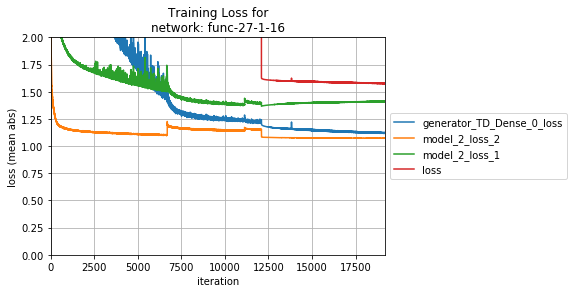

In [762]:
nd.plot_training_loss(network_model, 'mean abs', columns=['generator_TD_Dense_0_loss', 'model_2_loss_2', 'model_2_loss_1', 'loss'], weights=[20,1,1,10], start_index=0, y_max=2) 

In [763]:
with open(home + "/store/c2gen/out/"+network_model+"/training.log") as f:
    rl = f.readlines()
    print(str.join("",rl[0:1]))
    print(str.join("",rl[-10:]))
    

with open(home + "/store/c2gen/out/"+network_model+"/gen_counter") as f:
    latest_iter = (int(f.readlines()[0]))
    print(latest_iter)
    

epoch,generator_TD_Dense_0_loss,loss,model_1_loss,model_2_loss_1,model_2_loss_2

0,0.0560172992357,0.157690958016,0.320185871726,1.41146872568,1.07275388388
0,0.0559237966669,0.157569905537,0.320116572057,1.41077262218,1.07238488299
0,0.05613579996,0.157802130274,0.320021173826,1.41093941386,1.07279909934
0,0.055948510006,0.157606972843,0.320007596427,1.40933611045,1.07253313504
0,0.0561088288209,0.157821478222,0.320055331374,1.41129469857,1.07323532097
0,0.0561827583157,0.157887431945,0.320161355479,1.41249401354,1.07322949469
0,0.0559719947593,0.157635671182,0.320173955482,1.41137206956,1.07260875692
0,0.0561363064251,0.157797209173,0.319920202462,1.41129043673,1.07274533176
0,0.0561504759094,0.157823349359,0.319967002175,1.41078504355,1.07287920771
0,0.0559688892128,0.157626136436,0.319876225497,1.40923562902,1.07254135786

19200


Latest Iteration: 19200
3200 rate codec



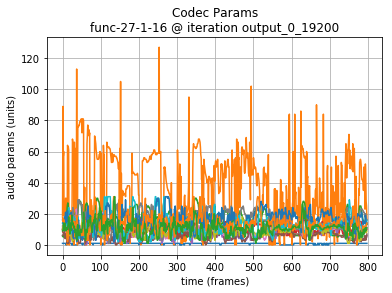

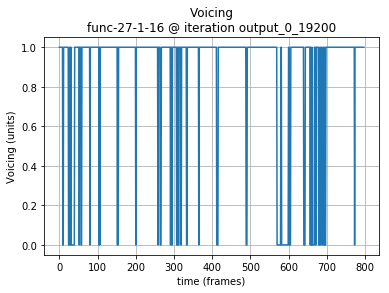

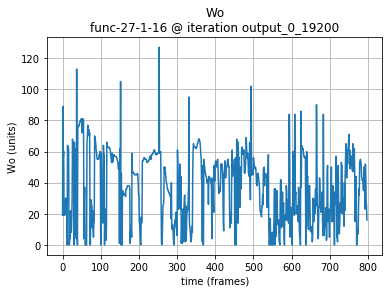

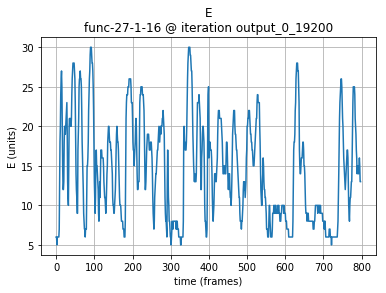

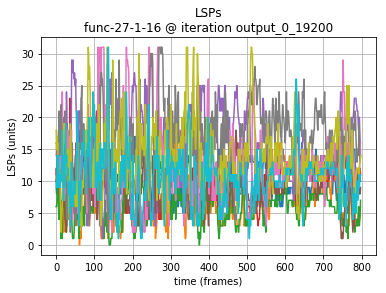

In [764]:
try:
  print("Latest Iteration:", latest_iter)
  
  output_fn_postfix = "output_" + str(0) + "_" + str(latest_iter)
  output_fn_postfix_mid = "output_" + str(1) + "_" + str(latest_iter)
  
  chart_postfix = output_fn_postfix

  nd.plot_codec_params(network_model,chart_postfix, scale_up='orig')
  nd.plot_spec_params(network_model,chart_postfix, params='Voicing')
  nd.plot_spec_params(network_model,chart_postfix, params='Wo')
  nd.plot_spec_params(network_model,chart_postfix, params='E')
  nd.plot_spec_params(network_model,chart_postfix, params='LSPs')
except FileNotFoundError:
    print("File not found")

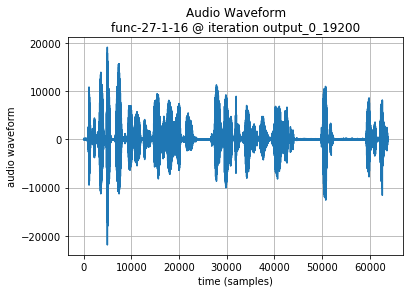

In [765]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

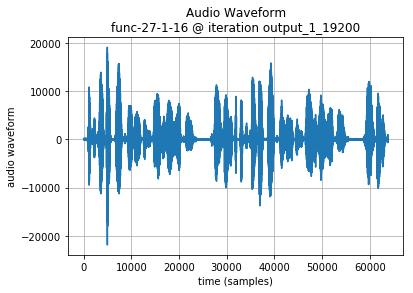

In [766]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix_mid)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

Early Iterations
===

In [767]:
print(output_fn_postfix1)
nd.plot_codec_params(network_model,output_fn_postfix1, scale_up='orig')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix1, params='E')
nd.plot_spec_params(network_model,output_fn_postfix1, params='LSPs')

output_0_24


FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/out/func-27-1-16/out-c2cb-output_0_24'

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix1)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)+codec_sub+".wav"))

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix1_mid)

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)+codec_sub+".wav"))

Later Iterations
===

In [ ]:
nd.plot_codec_params(network_model,output_fn_postfix2, scale_up=True)
nd.plot_spec_params(network_model,output_fn_postfix2, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix2, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix2, params='E')
nd.plot_spec_params(network_model,output_fn_postfix2, params='LSPs')

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix2)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix2)+codec_sub+".wav"))

## 